In [1]:
raw_data <- read.csv("SSL_RAT_70_80.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 829

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_Rank','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 829

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
158,387545,70-80,0,0,1,0,0,0.3,1,0
148,391116,70-80,0,1,0,0,0,0.3,0,0
143,392702,70-80,0,1,1,0,0,0.3,0,0
138,393847,70-80,0,1,0,0,0,-0.1,0,0
133,394919,70-80,0,1,1,0,0,-0.4,0,0
132,395095,70-80,0,0,1,0,0,0.1,1,0


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,481,92.76299,0.7168191
1,348,90.06897,0.7481266


In [7]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [8]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All           481     348
Matched       348     348
Unmatched     133       0
Discarded       0       0


In [9]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

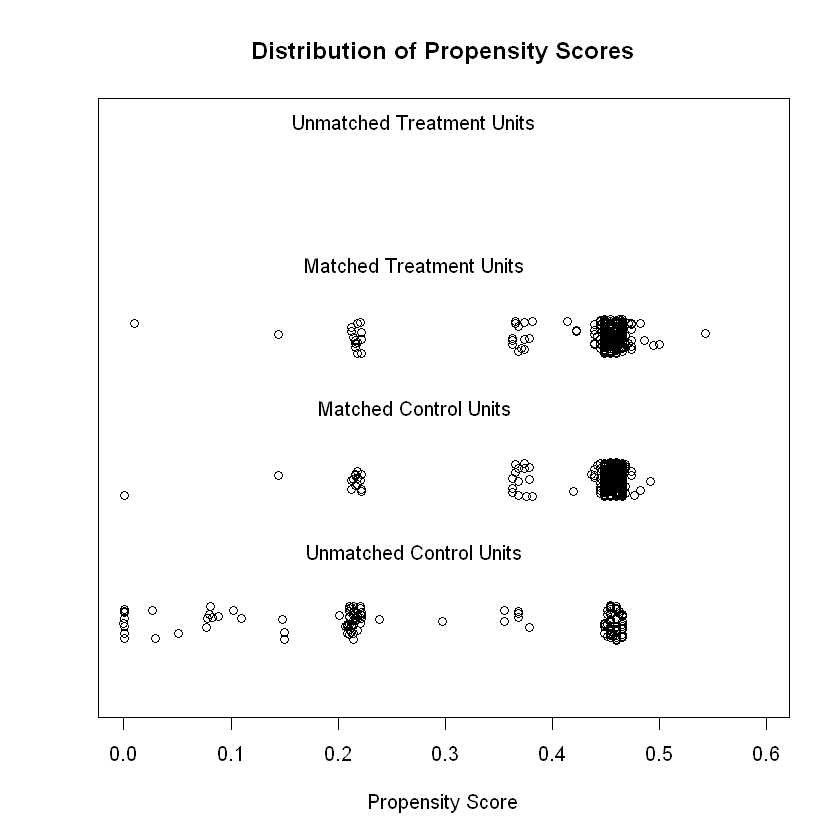

In [10]:
plot(mod_match, type = "jitter")

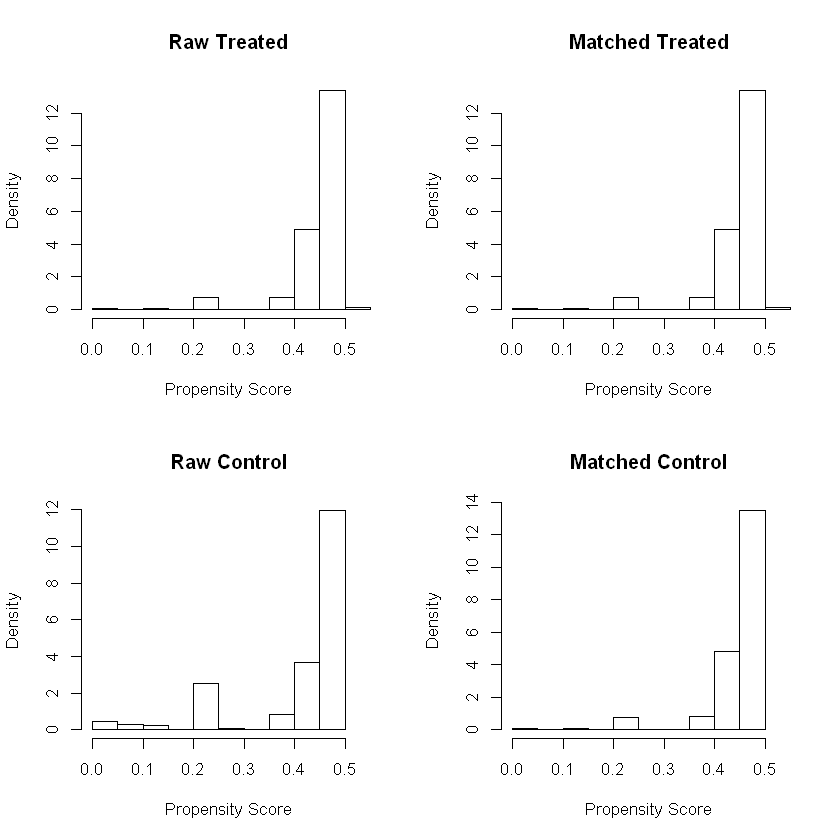

In [11]:
plot(mod_match, type = "hist")

In [12]:
head(matched)

,SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
1,158,387545,70-80,0,0,1,0,0,0.3,1,0,0.220635143,1
4,138,393847,70-80,0,1,0,0,0,-0.1,0,0,0.144179088,1
6,132,395095,70-80,0,0,1,0,0,0.1,1,0,0.216685468,1
8,132,395095,70-80,0,0,1,0,0,0.1,1,1,0.216685468,1
9,129,395508,70-80,0,0,0,0,4,0.3,0,1,0.009974043,1
13,127,395888,70-80,0,0,1,0,0,0.4,0,0,0.381864005,1


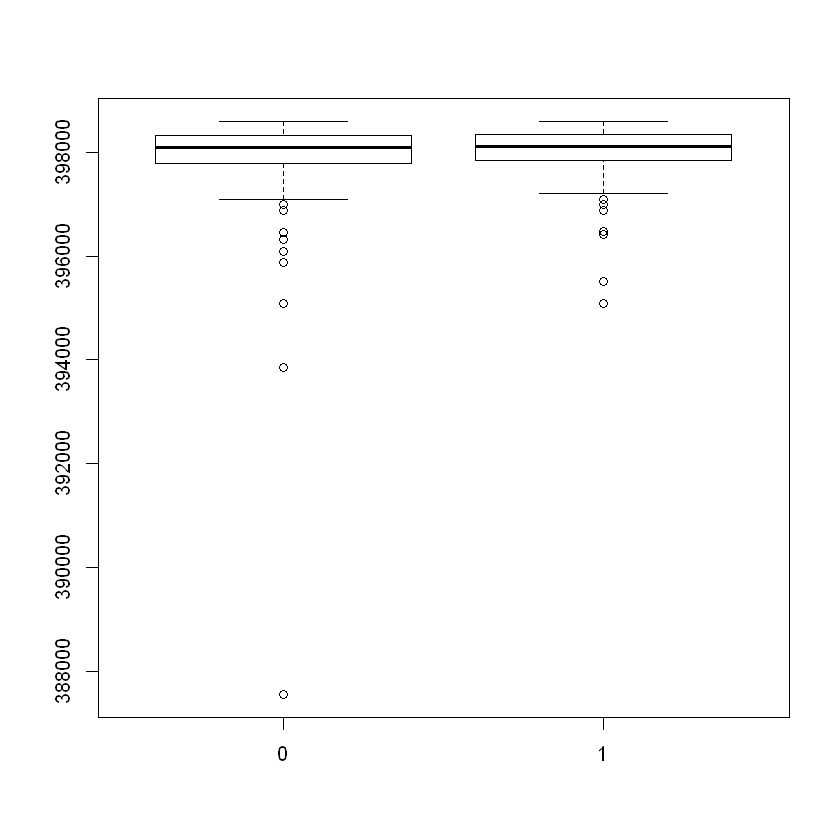

In [13]:
# Doing T - test on matched records
options(warn=-1)

attach(matched)
boxplot(SSL_SCORE_Rank~RACE_CODE_CD)

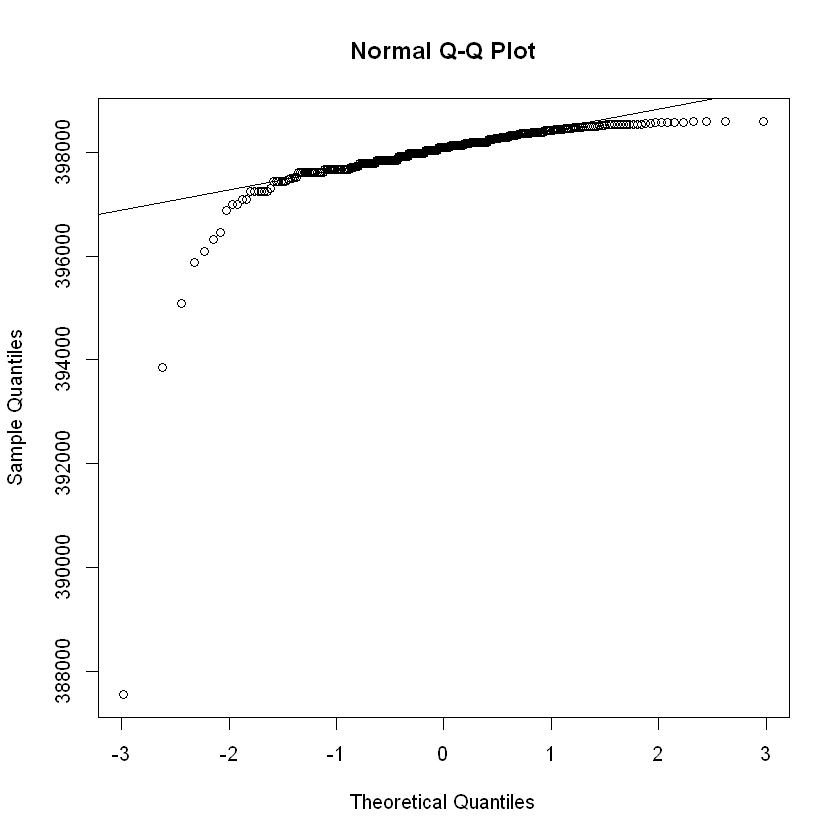

In [14]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$SSL_SCORE_Rank)
qqline(race_black$SSL_SCORE_Rank)

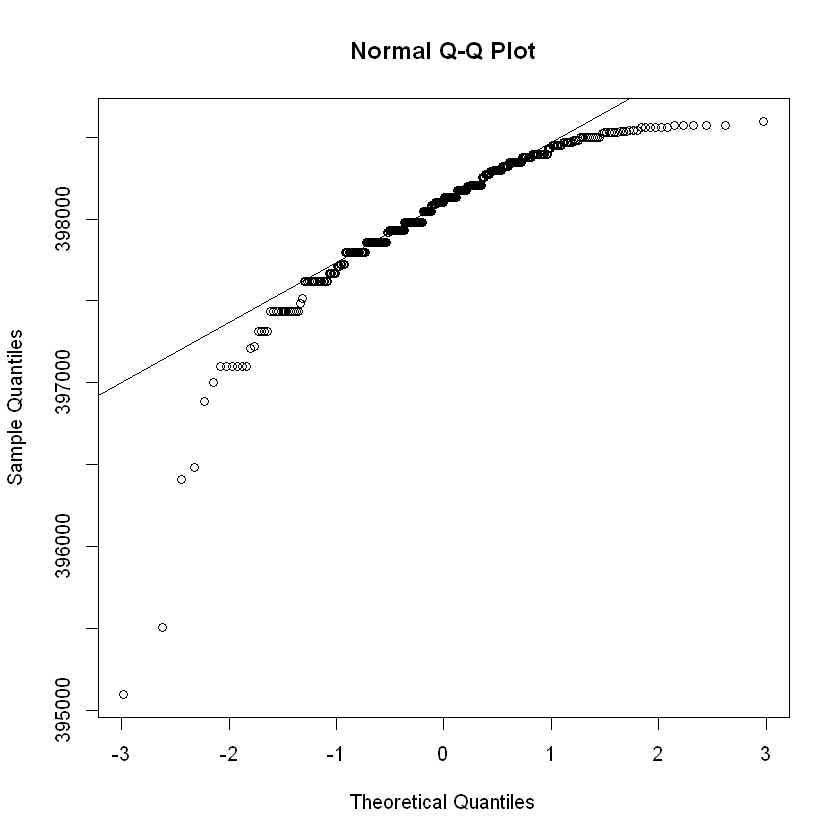

In [15]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$SSL_SCORE_Rank)
qqline(race_white$SSL_SCORE_Rank)

In [16]:
t.test(SSL_SCORE_Rank~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_Rank by RACE_CODE_CD
t = -1.1733, df = 554.19, p-value = 0.2412
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -143.76891   36.24592
sample estimates:
mean in group 0 mean in group 1 
       397987.7        398041.5 
